# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json
import requests

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

In [3]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
print(type(alpaca_api_key))
print(type(alpaca_secret_key))

<class 'str'>
<class 'str'>


In [4]:
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

## Part 1 - Personal Finance Planner

In [5]:
# Set monthly household income
monthly_income = 12000

### Collect Crypto Prices Using the `requests` Library

In [6]:
# Current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

# Concatenate url and api key
btc_url = btc_url + alpaca_api_key
eth_url = eth_url + alpaca_api_key

In [7]:
# Fetch current BTC
btc_df = requests.get(btc_url)

# Fetch current ETH
eth_df = requests.get(eth_url)

# Confirm data was fetched
btc_df, eth_df

(<Response [200]>, <Response [200]>)

### Compute current value of my crpto

In [9]:
# Convert btc_df to JSON
btc_data=btc_df.json()

# View btc_data using the "dumps" in the "json" function
print(json.dumps(btc_data, indent=4))

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18473912,
            "total_supply": 18473912,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 11531.51,
                    "volume_24h": 18770511685,
                    "market_cap": 212792193009,
                    "percentage_change_1h": 0.152525328219113,
                    "percentage_change_24h": 1.21469619134472,
                    "percentage_change_7d": 0.142256139486176,
                    "percent_change_1h": 0.152525328219113,
                    "percent_change_24h": 1.21469619134472,
                    "percent_change_7d": 0.142256139486176
                }
            },
            "last_updated": 1598686422
        }
    },
    "metadata": {
        "timestamp": 1598686422,
        "num_cryp

In [10]:
# Convert eth_df to JSON
eth_data=eth_df.json()

# View eth_data using the "dumps" in the "json" function
print(json.dumps(eth_data, indent=4))

{
    "data": {
        "1027": {
            "id": 1027,
            "name": "Ethereum",
            "symbol": "ETH",
            "website_slug": "ethereum",
            "rank": 2,
            "circulating_supply": 112377343,
            "total_supply": 112377343,
            "max_supply": 0,
            "quotes": {
                "USD": {
                    "price": 400.73,
                    "volume_24h": 10444905448,
                    "market_cap": 44879884084,
                    "percentage_change_1h": 0.550777346198179,
                    "percentage_change_24h": 3.33307821121382,
                    "percentage_change_7d": 3.59556512205584,
                    "percent_change_1h": 0.550777346198179,
                    "percent_change_24h": 3.33307821121382,
                    "percent_change_7d": 3.59556512205584
                }
            },
            "last_updated": 1598686463
        }
    },
    "metadata": {
        "timestamp": 1598686463,
        "num_crypto

In [11]:
# Fetch current BTC price
btc_price = btc_data['data']['1']['quotes']['USD']['price']
print(btc_price)

11531.51


In [12]:
# Fetch current ETH price
eth_price=eth_data['data']['1027']['quotes']['USD']['price']
print(eth_price)

400.73


In [13]:
# Compute current value of my crpto
my_btc_value = (my_btc * btc_price)
my_eth_value = (my_eth * eth_price)

# Sum the values of the crypto wallet
sum_crypto_value = my_btc_value + my_eth_value
sum_crypto_value

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}.")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}.")
print(f"The sum of ETH and BTC is ${sum_crypto_value:0.2f}.")

The current value of your 1.2 BTC is $13837.81.
The current value of your 5.3 ETH is $2123.87.
The sum of ETH and BTC is $15961.68.


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [23]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [38]:
# Format current date as ISO format
# The market is only open on weekdays!
today = pd.Timestamp("2020-08-28", tz="America/Chicago").isoformat()
today

'2020-08-28T00:00:00-05:00'

In [90]:
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
close_price_df = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today).df

# Display data
close_price_df

AGG                                       SPY  \
                             open    high     low   close    volume    open   
time                                                                          
2020-08-28 00:00:00-04:00  118.08  118.16  117.99  118.12  10432920  349.44   

                                                             
                             high     low   close    volume  
time                                                         
2020-08-28 00:00:00-04:00  350.72  348.15  350.54  84525436

In [91]:
# Pick AGG and SPY close prices
agg_cp = float(close_price_df["AGG"]["close"])
spy_cp = float(close_price_df["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_cp}")
print(f"Current SPY closing price: ${spy_cp}")

Current AGG closing price: $118.12
Current SPY closing price: $350.54


In [92]:
# Set current amount of shares data
shares_data = {"shares": [my_agg, my_spy]}

# Set the tickers as a list
tickers = ["AGG", "SPY"]

# Create the shares DataFrame
shares_df = pd.DataFrame(shares_data, index=tickers)

# Display shares data
shares_df

,shares
AGG,200
SPY,50


In [93]:
# Compute the current value of shares
agg_value = agg_cp * shares_df.loc["AGG"]["shares"]
spy_value = spy_cp * shares_df.loc["SPY"]["shares"]

# Sum current value of total stocks portfolio
sum_shares_value = agg_value + spy_value
sum_shares_value

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${spy_value:0.2f}.")
print(f"The current value of your {my_agg} AGG shares is ${agg_value:0.2f}.")
print(f"The sum of the SPY and AGG values are ${sum_shares_value:0.2f}.")

The current value of your 50 SPY shares is $17527.00.
The current value of your 200 AGG shares is $23624.00.
The sum of the SPY and AGG values are $41151.00.


### Savings Health Analysis

In [94]:
# Create savings DataFrame
df_assets= {
    "Amount" : [sum_crypto_value, sum_shares_value]}

# Set the index
assets = ["Crypto Wallet", "Stock Shares"]

# Create the shares DataFrame
df_assets = pd.DataFrame(df_assets, index=assets)

# Create the asset value DataFrame
df_savings = pd.DataFrame(df_assets)

# Display savings DataFrame
display(df_savings)

,Amount
Crypto Wallet,15961.681
Stock Shares,41151.000


<AxesSubplot:title={'center':'Savings Asset Composition'}, ylabel='Amount'>

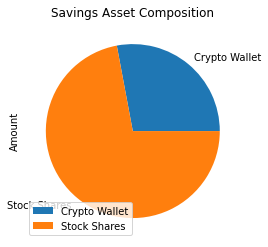

In [95]:
# Plot the savings pie chart
df_savings.plot.pie(y="Amount", title="Savings Asset Composition")

In [96]:
# Set ideal emergency fund
monthly_income = 12000
emergency_fund = monthly_income * 3
print(f"The ideal emergency fund is set to three times the monthly income, and you have ${emergency_fund:0.2f}.")

The ideal emergency fund is set to three times the monthly income, and you have $36000.00.


In [97]:
# Calculate total amount of savings
total_savings = sum_crypto_value + sum_shares_value
print(f"The current value of the crypto assets and stock assets is ${total_savings:0.2f}.")

The current value of the crypto assets and stock assets is $57112.68.


In [98]:
# Calculate difference between total_savings and emergency fund
health_savings = total_savings - emergency_fund
health_savings

21112.680999999997

In [99]:
# Validate savings health
# Compare total savings to emergency fund
if total_savings > emergency_fund:
    print("Congratulations, you have enough money an emergency fund.")
elif total_savings == emergency_fund: 
    print("Congratulations on reaching your financial goal.")
elif total_savings < emergency_fund: 
     print(f"You are ${(health_savings*-1):0.2f} away from reaching the goal of saving three times of your monthly expenses.")

Congratulations, you have enough money an emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [110]:
# Set start and end dates of five years back from today to get previous 5 year of prices
# Sample results may vary from the solution based on the time frame chosen
end_date = pd.Timestamp.now(tz="America/Chicago")
start_date = (end_date - pd.DateOffset(years=5)).isoformat()
print(f"Starting on {start_date}, \n"
      f"and ending on {end_date}.")

Starting on 2015-08-29T03:03:36.875813-05:00, 
and ending on 2020-08-29 03:03:36.875813-05:00.


In [132]:
# Get 5 years' worth of historical data for SPY and AGG
stock_data_df = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date).df

# Display sample data
stock_data_df.tail()

AGG                                       \
                             open      high      low   close    volume   
time                                                                     
2020-08-24 00:00:00-04:00  118.79  118.8000  118.600  118.62   7170552   
2020-08-25 00:00:00-04:00  118.35  118.4600  118.182  118.39   7205224   
2020-08-26 00:00:00-04:00  118.35  118.4199  118.210  118.36   9825986   
2020-08-27 00:00:00-04:00  118.55  118.5600  117.950  117.97  10926192   
2020-08-28 00:00:00-04:00  118.08  118.1600  117.990  118.12  10432920   

                                SPY                                         
                               open    high       low     close     volume  
time                                                                        
2020-08-24 00:00:00-04:00  342.0515  343.00  339.4504  342.9400   62620813  
2020-08-25 00:00:00-04:00  343.5300  344.21  342.2700  344.0999   64618459  
2020-08-26 00:00:00-04:00  344.7600  347.86  344.1700  347.5600   87596268  
2020-08-27 00:00:00-04:00  348.5100  349.90  346.5300  348.2900  102932378  
2020-08-28 00:00:00-04:00  349.4400  350.72  348.1500  350.5400   84525436

In [133]:
# Configure a Monte Carlo simulation to forecast 30 years cumulative returns
MC_weight = MCSimulation(
    portfolio_data = stock_data_df,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

# Print the simulation input data
MC_weight.portfolio_data.head()

AGG                                     \
                             open    high       low   close   volume   
time                                                                   
2015-08-31 00:00:00-04:00  109.28  109.37  108.9000  108.92  3866305   
2015-09-01 00:00:00-04:00  108.83  109.11  108.7700  109.01  3083045   
2015-09-02 00:00:00-04:00  108.92  109.05  108.8100  108.90  3273302   
2015-09-03 00:00:00-04:00  109.06  109.12  108.8701  109.04  1676171   
2015-09-04 00:00:00-04:00  109.19  109.33  109.0200  109.28  1529407   

                                           SPY                           \
                          daily_return    open     high     low   close   
time                                                                      
2015-08-31 00:00:00-04:00          NaN  198.11  199.125  197.01  197.60   
2015-09-01 00:00:00-04:00     0.000826  193.12  194.770  190.73  191.61   
2015-09-02 00:00:00-04:00    -0.001009  194.65  195.460  192.42  195.46   
2015-09-03 00:00:00-04:00     0.001286  196.26  198.050  194.96  195.55   
2015-09-04 00:00:00-04:00     0.002201  192.85  193.860  191.61  192.56   

                                                   
                              volume daily_return  
time                                               
2015-08-31 00:00:00-04:00  108023599          NaN  
2015-09-01 00:00:00-04:00  173963880    -0.030314  
2015-09-02 00:00:00-04:00  120044919     0.020093  
2015-09-03 00:00:00-04:00  117191452     0.000460  
2015-09-04 00:00:00-04:00  121958169    -0.015290

In [134]:
# Run a Monte Carlo simulation to forecast 30 years cumulative returns
# Remember to restart kernel.  Changed setting in MCForecastTools.py
# from "n%10 == to n%100", so print less simulations
MC_weight.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 400.


,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004829,1.009744,1.000308,0.992480,1.003697,1.000791,1.008075,0.977753,1.012894,1.014011,...,1.012150,1.009060,1.002701,0.996948,1.004499,0.997843,1.012237,0.997406,0.993967,0.981185
2,1.007593,1.016322,1.020598,0.999624,1.003126,0.988475,1.005219,0.982119,1.023347,1.013102,...,1.022089,0.995470,0.990769,0.997012,1.003532,1.009337,1.010195,0.998260,0.990053,0.963665
3,1.005989,1.010907,1.027973,1.000393,1.006811,0.992061,0.999951,0.970656,1.029059,1.017726,...,1.010228,0.983397,0.981761,0.998708,1.002012,1.015870,1.013068,1.005499,1.007563,0.971927
4,0.997861,1.020530,1.011205,1.016023,1.006555,0.990564,0.990616,0.961373,1.018314,1.027913,...,1.002826,0.983245,0.978408,0.991079,1.008256,1.012404,1.013246,1.004520,1.008509,0.959608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,12.972597,7.248948,23.920583,13.403828,9.646809,15.484322,22.712487,5.590996,36.347351,11.252591,...,24.050043,20.915463,4.806814,6.148522,8.789359,10.454839,8.493928,10.545200,14.434546,21.010496
7557,12.964845,7.203852,23.783100,13.398384,9.648935,15.402867,22.407601,5.567824,36.285253,11.216058,...,24.220861,21.250059,4.867865,6.195587,8.685193,10.459158,8.423181,10.576657,14.290498,21.148198
7558,13.005636,7.273802,23.796399,13.283056,9.609070,15.298602,22.504151,5.530851,36.336159,11.236460,...,23.987304,21.264523,4.886239,6.269990,8.745856,10.466519,8.435990,10.594990,14.375200,21.204906
7559,12.992140,7.204642,23.659401,13.331109,9.630383,15.347798,22.543763,5.536786,35.907070,11.281828,...,23.859097,21.575450,4.911136,6.269882,8.794275,10.413136,8.534860,10.575625,14.314442,20.999119


In [136]:
# Compute summary statistics from the simulated daily returns
simulated_returns_data = {
    "mean": list(MC_weight.simulated_return.mean(axis=1)),
    "median": list(MC_weight.simulated_return.median(axis=1)),
    "min": list(MC_weight.simulated_return.min(axis=1)),
    "max": list(MC_weight.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
simulated_returns_df = pd.DataFrame(simulated_returns_data)

# Display sample data
simulated_returns_df.head()

,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,0.999889,0.999935,0.975684,1.019644
2,1.000024,0.999730,0.963665,1.034771
3,1.000261,1.000289,0.956470,1.035233
4,1.000706,1.001439,0.959169,1.042937


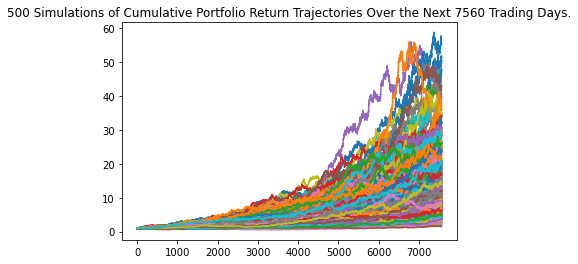

In [139]:
# Plot simulation outcomes
line_plot = MC_weight.plot_simulation()

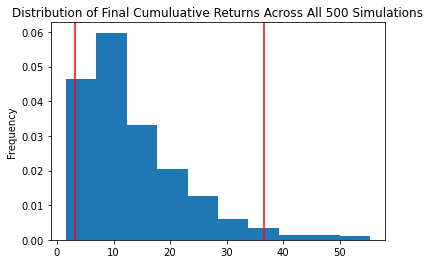

In [140]:
# Plot probability distribution and confidence intervals
dist_plot = MC_weight.plot_distribution()

### Retirement Analysis

In [142]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_weight.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean             13.468533
std               9.041681
min               1.549666
25%               6.937493
50%              10.876423
75%              17.641956
max              55.396182
95% CI Lower      3.184066
95% CI Upper     36.662153
Name: 7560, dtype: float64


### Given an initial investment of $20,000, what is the expected portfolio return in dollars at the 95% lower and upper confidence intervals?

In [143]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*20000, 2)
ci_upper = round(tbl[9]*20000, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}.")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $63681.31 and $733243.06.


In [144]:
# Multiply an initial investment by the daily returns of simulative stock prices to return the progression of daily returns in terms of money
cumulative_pnl = initial_investment * simulated_returns_df

# Display sample data
cumulative_pnl.head()

,mean,median,min,max
0,20000.000000,20000.000000,20000.000000,20000.000000
1,19997.779053,19998.696747,19513.672505,20392.872159
2,20000.488196,19994.608657,19273.296632,20695.426440
3,20005.214694,20005.773605,19129.392750,20704.660691
4,20014.118858,20028.773493,19183.389950,20858.747939


### How would a 50% increase in the initial investment amount affect the expected portfolio return in dollars at the 95% lower and upper confidence intervals?

In [145]:
# Set initial investment
initial_investment_increase = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
cumulative_pnl_increase = initial_investment_increase * simulated_returns_df

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_increase} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}.")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $63681.31 and $733243.06.


# Optional Challenge - Early Retirement


## Five Years Retirement Option

In [152]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five = MCSimulation(
    portfolio_data = stock_data_df,
    weights = [.40, .60],
    num_simulation = 500,
    num_trading_days = 252*5
)

# Print the simulation input data
MC_five.portfolio_data.tail()

AGG                                       \
                             open      high      low   close    volume   
time                                                                     
2020-08-24 00:00:00-04:00  118.79  118.8000  118.600  118.62   7170552   
2020-08-25 00:00:00-04:00  118.35  118.4600  118.182  118.39   7205224   
2020-08-26 00:00:00-04:00  118.35  118.4199  118.210  118.36   9825986   
2020-08-27 00:00:00-04:00  118.55  118.5600  117.950  117.97  10926192   
2020-08-28 00:00:00-04:00  118.08  118.1600  117.990  118.12  10432920   

                                             SPY                              \
                          daily_return      open    high       low     close   
time                                                                           
2020-08-24 00:00:00-04:00    -0.000590  342.0515  343.00  339.4504  342.9400   
2020-08-25 00:00:00-04:00    -0.001939  343.5300  344.21  342.2700  344.0999   
2020-08-26 00:00:00-04:00    -0.000253  344.7600  347.86  344.1700  347.5600   
2020-08-27 00:00:00-04:00    -0.003295  348.5100  349.90  346.5300  348.2900   
2020-08-28 00:00:00-04:00     0.001272  349.4400  350.72  348.1500  350.5400   

                                                   
                              volume daily_return  
time                                               
2020-08-24 00:00:00-04:00   62620813     0.010311  
2020-08-25 00:00:00-04:00   64618459     0.003382  
2020-08-26 00:00:00-04:00   87596268     0.010056  
2020-08-27 00:00:00-04:00  102932378     0.002100  
2020-08-28 00:00:00-04:00   84525436     0.006460

In [153]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 400.


,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.008347,0.994586,1.000971,1.010262,1.002443,0.999184,1.002407,0.994484,0.998710,1.004841,...,1.000171,0.997214,1.009702,1.002542,1.008227,0.988248,1.010180,1.002253,1.000304,0.993726
2,1.000200,1.004512,1.004470,0.998633,1.001792,0.990903,0.996186,0.986506,1.002677,1.002249,...,1.001406,0.980374,1.010984,1.002313,1.008325,0.980884,0.996458,1.015967,1.004328,0.994176
3,1.004777,1.005150,0.997409,0.998055,0.994981,0.989387,0.998636,0.994835,1.010146,0.994888,...,1.005399,0.980902,1.018142,0.996232,1.016738,0.974326,0.994835,1.003027,0.988583,0.982488
4,1.005509,0.992432,1.008164,0.997437,0.995809,0.995980,1.003690,0.993346,1.007956,0.996997,...,0.995616,0.963442,1.027636,0.990644,1.016617,0.974236,0.991933,1.003526,0.985648,0.994371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.490845,0.988905,1.508722,1.768993,1.606332,1.166034,1.669995,2.434845,1.284741,1.092138,...,1.046711,1.928105,1.324601,1.187921,1.702562,1.142566,1.375845,1.666658,1.180109,1.914759
1257,1.482801,0.991620,1.512957,1.755365,1.598362,1.155450,1.641531,2.439909,1.282124,1.098549,...,1.046581,1.931546,1.322136,1.191664,1.719901,1.134332,1.381910,1.671930,1.181568,1.937326
1258,1.472490,0.994815,1.515081,1.740464,1.601968,1.158231,1.668571,2.460917,1.276268,1.090605,...,1.056490,1.923579,1.306296,1.205170,1.714667,1.131549,1.382377,1.691709,1.179705,1.958549
1259,1.464488,0.999966,1.519881,1.732750,1.616879,1.154758,1.687765,2.469738,1.267593,1.092829,...,1.061312,1.926068,1.319361,1.201286,1.714907,1.134149,1.374951,1.682936,1.165054,1.987310


In [154]:
# Compute summary statistics from the simulated daily returns
simulated_five_data = {
    "mean": list(MC_five.simulated_return.mean(axis=1)),
    "median": list(MC_five.simulated_return.median(axis=1)),
    "min": list(MC_five.simulated_return.min(axis=1)),
    "max": list(MC_five.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
simulated_five_df = pd.DataFrame(simulated_five_data)

# Display sample data
simulated_five_df.head()

,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,1.000882,1.001138,0.981130,1.024522
2,1.001172,1.001298,0.969757,1.028376
3,1.001618,1.000935,0.972911,1.038829
4,1.001606,1.001266,0.963442,1.050314


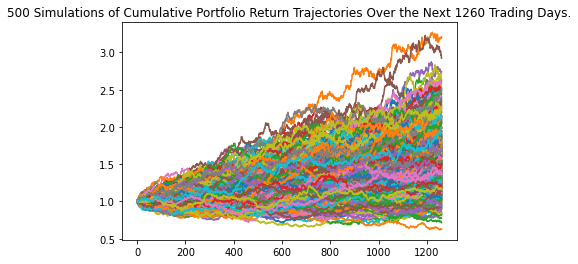

In [155]:
# Plot simulation outcomes
line_plot_five = MC_five.plot_simulation()

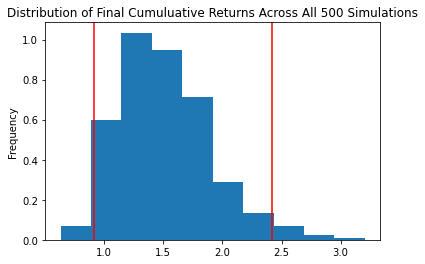

In [157]:
# Plot probability distribution and confidence intervals
dist_plot_five = MC_five.plot_distribution()

In [158]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_five = MC_five.summarize_cumulative_return()
# Print summary statistics
print(tbl_five)

count           500.000000
mean              1.506469
std               0.389257
min               0.631841
25%               1.214554
50%               1.464406
75%               1.715884
max               3.204585
95% CI Lower      0.918691
95% CI Upper      2.421449
Name: 1260, dtype: float64


In [162]:
# Set initial investment
initial_investment_five = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower_five = round(tbl_five[8]*20000*1.5, 2)
ci_upper_five = round(tbl_five[9]*20000*1.5, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_five} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 5 years will end within in the range of $27560.72 and $72643.47


### Ten Years Retirement Option

In [163]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten = MCSimulation(
    portfolio_data = stock_data_df,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*10
)

# Print the simulation input data
MC_ten.portfolio_data.tail()

AGG                                       \
                             open      high      low   close    volume   
time                                                                     
2020-08-24 00:00:00-04:00  118.79  118.8000  118.600  118.62   7170552   
2020-08-25 00:00:00-04:00  118.35  118.4600  118.182  118.39   7205224   
2020-08-26 00:00:00-04:00  118.35  118.4199  118.210  118.36   9825986   
2020-08-27 00:00:00-04:00  118.55  118.5600  117.950  117.97  10926192   
2020-08-28 00:00:00-04:00  118.08  118.1600  117.990  118.12  10432920   

                                             SPY                              \
                          daily_return      open    high       low     close   
time                                                                           
2020-08-24 00:00:00-04:00    -0.000590  342.0515  343.00  339.4504  342.9400   
2020-08-25 00:00:00-04:00    -0.001939  343.5300  344.21  342.2700  344.0999   
2020-08-26 00:00:00-04:00    -0.000253  344.7600  347.86  344.1700  347.5600   
2020-08-27 00:00:00-04:00    -0.003295  348.5100  349.90  346.5300  348.2900   
2020-08-28 00:00:00-04:00     0.001272  349.4400  350.72  348.1500  350.5400   

                                                   
                              volume daily_return  
time                                               
2020-08-24 00:00:00-04:00   62620813     0.010311  
2020-08-25 00:00:00-04:00   64618459     0.003382  
2020-08-26 00:00:00-04:00   87596268     0.010056  
2020-08-27 00:00:00-04:00  102932378     0.002100  
2020-08-28 00:00:00-04:00   84525436     0.006460

In [164]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 400.


,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995931,0.991986,1.002505,0.995009,1.003573,0.998574,1.008354,0.999592,0.999866,0.996150,...,1.000854,1.014275,0.993710,1.006977,1.008114,1.000839,1.011112,1.006987,1.014383,1.000428
2,1.006640,0.991679,1.000570,1.003310,1.023472,0.999523,1.004875,1.005868,1.006108,0.992203,...,0.999618,1.016940,0.998887,1.022418,1.012863,1.002256,1.009294,0.994381,1.021717,1.007823
3,1.007304,0.981296,0.984420,1.001017,1.024067,1.014543,1.012237,1.005844,1.008012,0.986334,...,0.995641,1.018343,1.003596,1.036179,0.990777,0.990067,1.012384,0.989417,1.018679,1.000706
4,1.020121,0.984107,0.991847,1.012393,1.018272,1.013014,1.011347,0.999553,1.003119,0.984587,...,0.992899,1.022478,0.994878,1.039446,0.996389,0.988499,1.014115,0.991427,1.027697,0.999483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.106784,1.391992,1.797950,2.614975,2.373691,3.327650,1.248194,2.747444,1.807313,1.418862,...,3.803413,2.310590,2.506480,1.785756,2.278790,2.073826,1.293519,2.496208,1.353215,3.017609
2517,1.113234,1.380651,1.805596,2.597693,2.383919,3.370724,1.249126,2.772635,1.800323,1.432950,...,3.822723,2.329598,2.509649,1.767073,2.288334,2.065210,1.289235,2.480505,1.355565,3.032244
2518,1.129006,1.396046,1.779057,2.609000,2.385042,3.359691,1.242353,2.743367,1.795598,1.416810,...,3.806414,2.319477,2.512689,1.758884,2.276600,2.050709,1.292653,2.483334,1.354851,3.033643
2519,1.131647,1.404734,1.791620,2.599561,2.377651,3.336799,1.241952,2.735679,1.801020,1.424989,...,3.851908,2.281860,2.515311,1.758632,2.270630,2.066521,1.295268,2.457662,1.340394,3.013962


In [165]:
# Compute summary statistics from the simulated daily returns
simulated_ten_data = {
    "mean": list(MC_ten.simulated_return.mean(axis=1)),
    "median": list(MC_ten.simulated_return.median(axis=1)),
    "min": list(MC_ten.simulated_return.min(axis=1)),
    "max": list(MC_ten.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
simulated_ten_df = pd.DataFrame(simulated_ten_data)

# Display sample data
simulated_ten_df.head()

,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,1.000728,1.000839,0.970589,1.023990
2,1.000733,1.000561,0.973796,1.029773
3,1.001455,1.000387,0.970758,1.036749
4,1.001662,1.001335,0.961332,1.039446


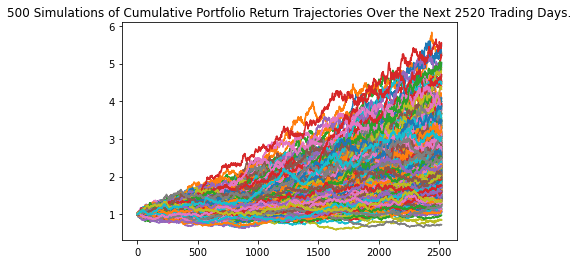

In [166]:
# Plot simulation outcomes
line_plot_ten = MC_ten.plot_simulation()

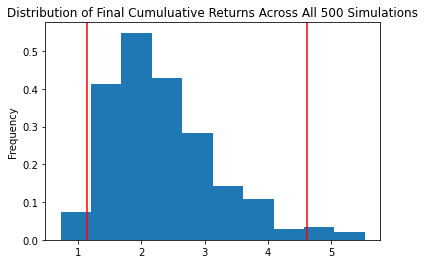

In [167]:
# Plot probability distribution and confidence intervals
dist_plot_ten = MC_ten.plot_distribution()

In [168]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_ten = MC_ten.summarize_cumulative_return()

# Print summary statistics
print(tbl_ten)

count           500.000000
mean              2.341694
std               0.867049
min               0.723167
25%               1.719668
50%               2.166231
75%               2.769629
max               5.531279
95% CI Lower      1.135381
95% CI Upper      4.610262
Name: 2520, dtype: float64


In [169]:
# Set initial investment
initial_investment_ten = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower_ten = round(tbl_ten[8]*20000*1.5, 2)
ci_upper_ten = round(tbl_ten[9]*20000*1.5, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_ten} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 5 years will end within in the range of $34061.42 and $138307.85
